In [1]:
def plot_graph(filename, minimum_thresold = 10 ):
    " Given the csv obtained from the previous function it plot a graph having only \
    the nodes and edges which reach the minimun threesold    "
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import networkx as nx
    df = pd.read_csv(filename)
    if "to_what" in df.columns :
        df= pd.DataFrame(df["to_who"].value_counts())
    elif "title" in df.columns:
        df= pd.DataFrame(df["title"].value_counts())
    G = nx.DiGraph()
    df.reset_index(False, inplace=True)
    df.columns = ["to_who","how_many"]
    df = df[df["how_many"]>  minimum_thresold]
    for iel in range(len(df)):
        G.add_edge("MySelf", df["to_who"][iel], weight = df["how_many"][iel])  
    size = [3000]
    color = ["lightblue"]
    arrow_size = []
    i = 0
    temp = list(G.edges(data=True))
    temp2 = sum([x[2]["weight"] for x in temp])
    for row in G.edges(data=True):
        color.append("orange")
        size.append((row[2]["weight"]*100)/(minimum_thresold/2))                      # **
        arrow_size.append(((row[2]["weight"]/temp2)*len(temp) )+1.5)                  # **
        i+=1
    plt.figure(10,figsize=(15,15))
    pos=nx.spring_layout(G)
    nx.draw(G, node_color=color,node_shape="p",with_labels=True, node_size=size,width=arrow_size, edge_color ="green", alpha=0.9,)

In the complete code there also will be displayed the label of the actors, so the name. in order to show how it works i decided to temporarly remove the labels for privacy of the person who gave me this data. however if you use the code below the labels will be appears.

i had some trouble to organise the dimension of the arrows and the nodes in case modify the part with * in the code.

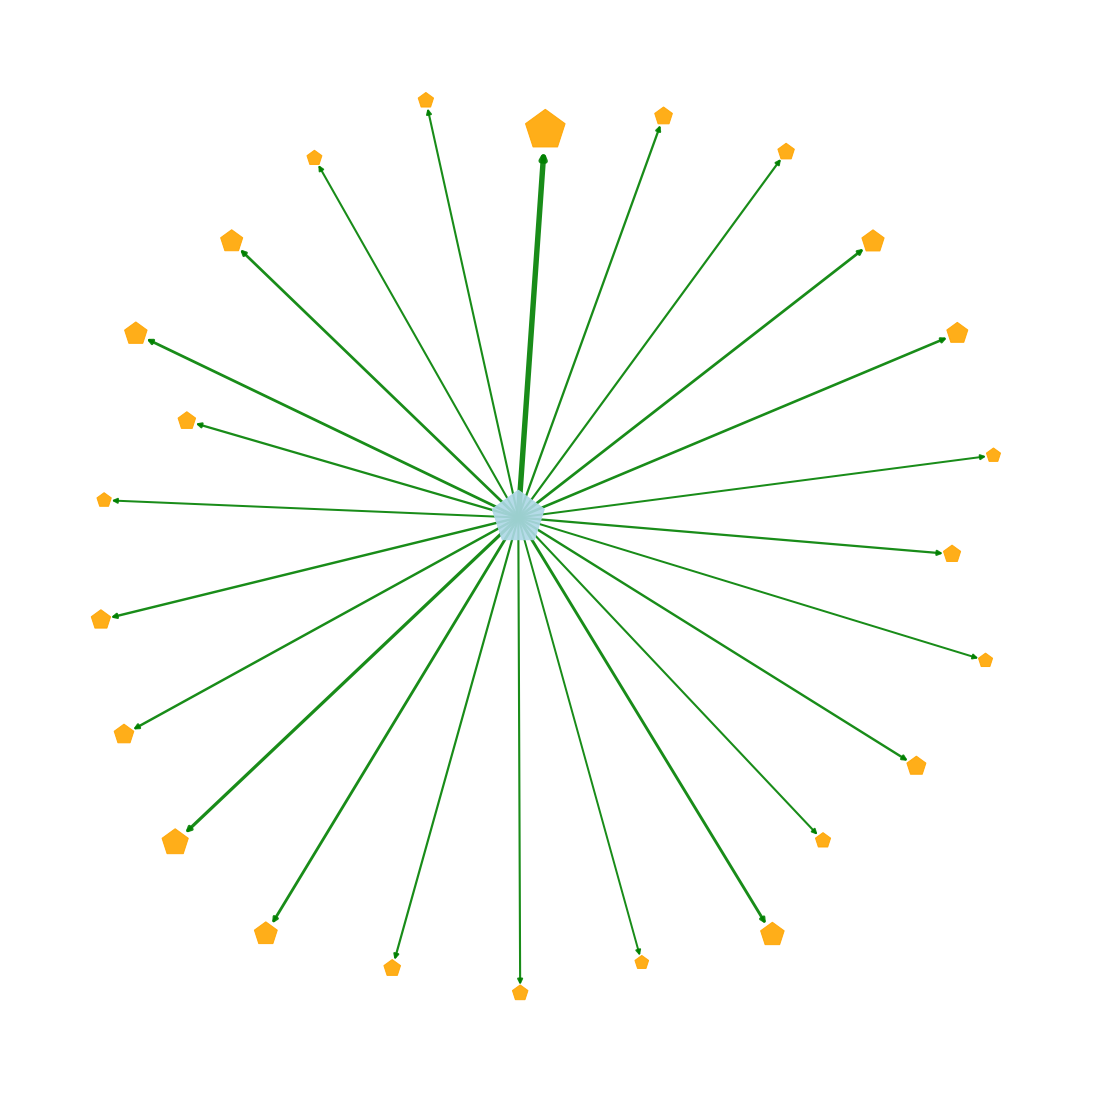

In [2]:
plot_graph("like.csv",minimum_thresold=30)